<a href="https://colab.research.google.com/github/VasanthPrakasam/ML--Salary-Dataset---Simple-linear-regression/blob/main/ML_Salary_Dataset_Simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression from Scratch — Salary vs Years of Experience**
- This notebook demonstrates a simple linear regression implemented from scratch (no scikit-learn).
- Me use a small salary dataset to predict Salary based on YearsExperience.


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/salary-dataset-simple-linear-regression


In [2]:
import os
os.listdir(path)

['Salary_dataset.csv']

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as sm

In [6]:
data = pd.read_csv(os.path.join(path, 'Salary_dataset.csv'))
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [7]:
X = data['YearsExperience']
y = data['Salary']

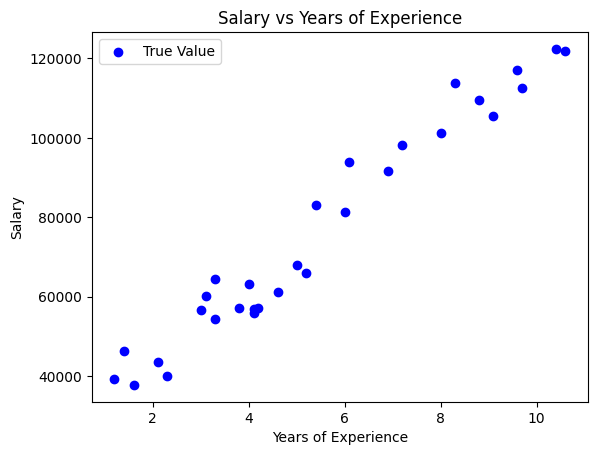

In [8]:
plt.figure()
plt.scatter(X, y, color='blue', label='True Value')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.legend()
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape((len(X_test),1))
y_test = np.array(y_test).reshape((len(y_test),1))

In [12]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_train_pred = model.predict(X_train)

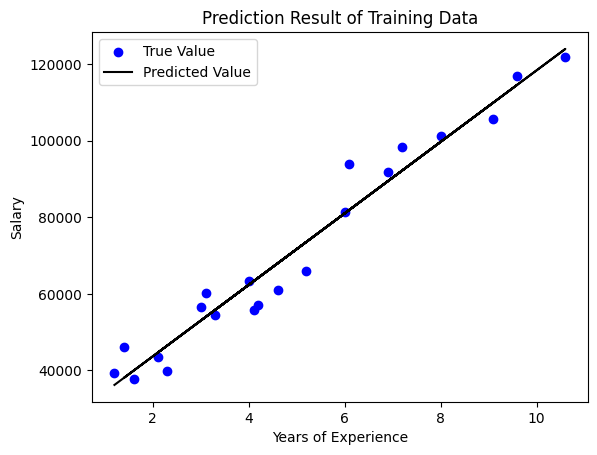

In [14]:
plt.figure()
plt.scatter(X_train, y_train, color='blue', label='True Value')
plt.plot(X_train, y_train_pred, color='black', label='Predicted Value')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Prediction Result of Training Data')
plt.legend()
plt.show()

In [15]:
y_test_pred = model.predict(X_test)

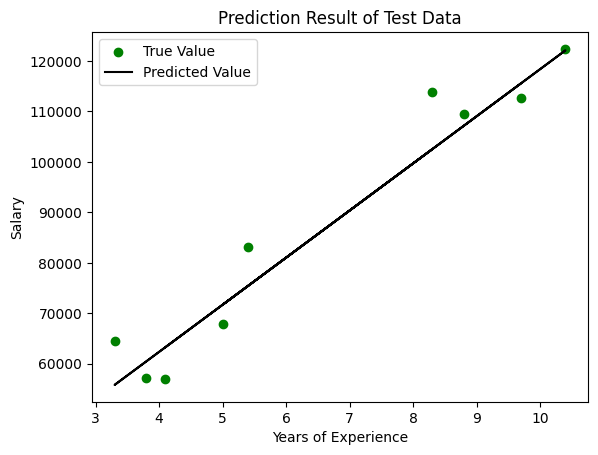

In [16]:
plt.figure()
plt.scatter(X_test, y_test, color='green', label='True Value')
plt.plot(X_test, y_test_pred, color='black', label='Predicted Value')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Prediction Result of Test Data')
plt.legend()
plt.show()

In [20]:
print("mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred),2))
print("Explain Variance score =", round(sm.explained_variance_score(y_test, y_test_pred),2))
print("r2 score =", round(sm.r2_score(y_test, y_test_pred),2))

mean squared error = 37784662.47
Explain Variance score = 0.95
r2 score = 0.94
